<a href="https://colab.research.google.com/github/Anshul007/PyTorch-for-deep-learning-in-a-day/blob/main/Daniel_Bourke_Lecture_04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importing libraries and Device augmented code

In [1]:
import torch
from torch import nn
print(torch.__version__)
# import torchvision.dataset


2.5.0+cu121


In [2]:
# set up the device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get Data

> Here we will be utilizing the Food101 dataset from torchvision library. instead of 101 class_names we will take only 3 classes.
- Ex: Pizza, Steak, Sushi

-----
Note: here is the [notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) link

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


# Becoming one with the data (data prepration and dataxploration)

In [4]:
import os

def walk_through_dir(dir_path):
  ''' walks through dir_path and returning it's content'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

# dir_path = "/content/data/pizza_steak_sushi"
walk_through_dir(dir_path= image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [5]:
# setup train and test path
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Vizualizing the data

1. get all the image from path
2. select random image from the path. `random.choice`
3. get the image class name using `pathlib.Path.parent.stem`
4.

data/pizza_steak_sushi/train/sushi/200025.jpg
the class name of random image is sushi
Height is 512 | Width is 382


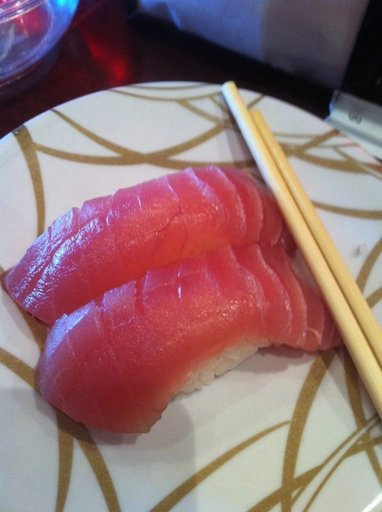

In [6]:
import random
from PIL import Image

# set seed
random.seed(42)

# 1. get all the image path
image_list_path = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image
random_image_path = random.choice(image_list_path)
print(random_image_path)

# 3. Get the directory name from the image path
image_class = random_image_path.parent.stem
print(f"the class name of random image is {image_class}")

# 4. open image
img = Image.open(random_image_path)
### get the meta data
print(f"Height is {img.height} | Width is {img.width}")
img

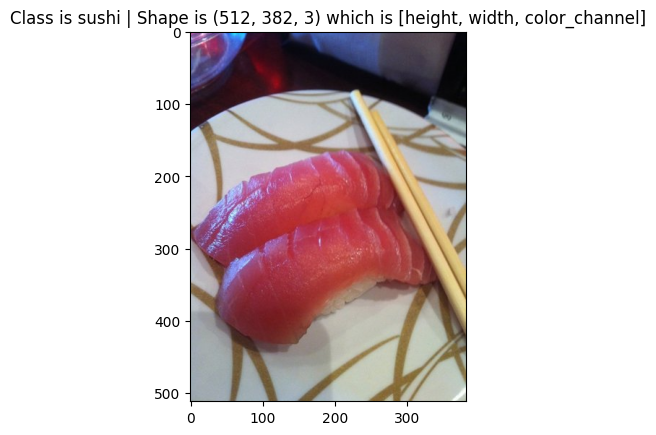

In [7]:
### Try top visulize with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn image into arrary
image_as_array = np.array(img)

# plot the image
# plt.figire(fig_size=(10,7))
plt.imshow(image_as_array)
plt.title(f"Class is {image_class} | Shape is {image_as_array.shape} which is [height, width, color_channel]")
plt.show()

```python
### Try top visulize with matplotlib
import matplotlib.image as mpimg

# set seed
random.seed(42)

# 1. get all the image path
image_list_path = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image
random_image_path = random.choice(image_list_path)
print(random_image_path)

# 3. Get the directory name from the image path
image_class = random_image_path.parent.stem
print(f"the class name of random image is {image_class}")

# 4.
mpimg.imread(random_image_path)

```

# Transforming Data
##Turning image into tensor

No matter what data you are dealing with image, audio, video all needs to be turned into tensors.

1. Turn your data target data into tensors.
2. Turn it into a `torch.utils.data.Dataset` and subsquently a `torch.utils.data.DataLoader`. We will call these `Dataset` and `DataLoader`.

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

''' There are 2 types of transforms v1 and v2.
v1: torchvision.transforms
v2: torchvision.transforms.v2 | This is computationaly faters then v1
'''

' There are 2 types of transforms v1 and v2.\nv1: torchvision.transforms\nv2: torchvision.transforms.v2 | This is computationaly faters then v1\n'

### Transforming data with `torchvision.transforms`

In [9]:
# write a transform for image
# data_transform = nn.Sequential # we can also use
data_transform = transforms.Compose([
    # Resize our image into 64x64
    transforms.Resize(size= (64,64)),
    # Flip the images randomly on the horizontly
    transforms.RandomHorizontalFlip(p= 0.5),
    # Turn the image into torch.Tensor
    transforms.ToTensor()
])
''' This will accept image as in PIL format. '''

' This will accept image as in PIL format. '

In [10]:
data_transformed = data_transform(img)
type(data_transformed), data_transform(img).shape

(torch.Tensor, torch.Size([3, 64, 64]))

In [11]:
data_transformed

tensor([[[0.0235, 0.0314, 0.1451,  ..., 0.6941, 0.5961, 0.6235],
         [0.0235, 0.0235, 0.0824,  ..., 0.6588, 0.5686, 0.5765],
         [0.0196, 0.0196, 0.0392,  ..., 0.6275, 0.5686, 0.5451],
         ...,
         [0.7922, 0.7608, 0.7569,  ..., 0.6314, 0.6275, 0.6196],
         [0.9059, 0.8510, 0.7725,  ..., 0.6275, 0.6196, 0.6157],
         [0.7843, 0.8706, 0.8784,  ..., 0.6235, 0.6118, 0.6039]],

        [[0.0235, 0.0275, 0.1216,  ..., 0.5098, 0.3804, 0.3765],
         [0.0235, 0.0235, 0.0627,  ..., 0.4863, 0.4118, 0.4627],
         [0.0196, 0.0235, 0.0314,  ..., 0.3922, 0.4431, 0.4549],
         ...,
         [0.8471, 0.8039, 0.7882,  ..., 0.6667, 0.6667, 0.6667],
         [0.9333, 0.8824, 0.8039,  ..., 0.6667, 0.6588, 0.6549],
         [0.8118, 0.8980, 0.9059,  ..., 0.6667, 0.6549, 0.6471]],

        [[0.0471, 0.0510, 0.1490,  ..., 0.7294, 0.6471, 0.6392],
         [0.0431, 0.0431, 0.0980,  ..., 0.6863, 0.6471, 0.7176],
         [0.0353, 0.0353, 0.0510,  ..., 0.5412, 0.6118, 0.

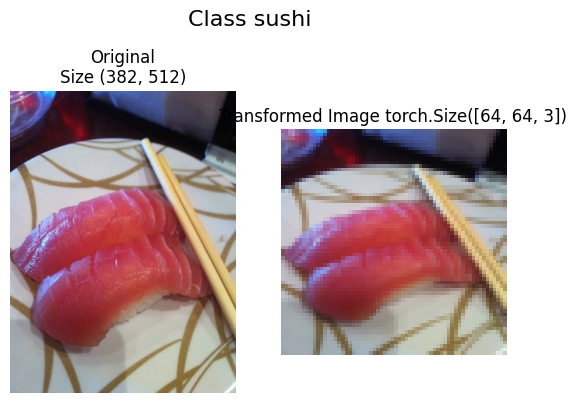

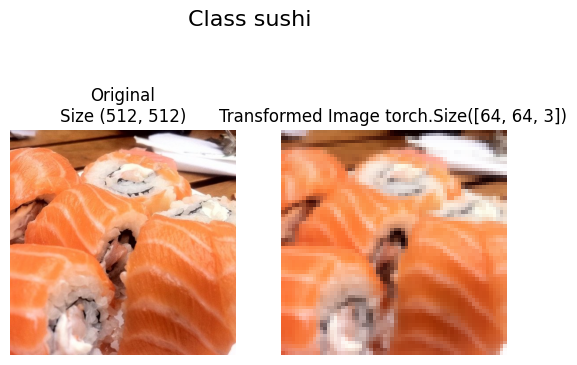

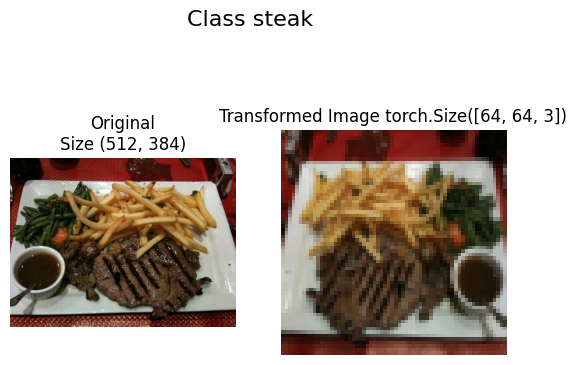

In [12]:
# plt.imshow(data_transformed.squeeze(dim=0))
# Plotting the transformed images
def plot_transformed_image(images_path, image_transformer, n=3, seed= 42):
  '''Selects random image from the path of the image and load/transform.
  then plots the original vs transforms vsersion'''
  if seed:
    random.seed(seed)

  # get the random image path
  random_image_path = random.sample(images_path, k=n)

  for image_path in random_image_path:
    with Image.open(image_path) as random_image:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(random_image)
      ax[0].set_title(f"Original\nSize {random_image.size}")
      ax[0].axis(False)

      ### Transform and plot the target image
      transformed_image = image_transformer(random_image).permute(1,2,0) # we will need to change the shape of
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Image {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class {image_path.parent.stem}", fontsize= 16)

# Calling the function
plot_transformed_image(images_path= image_list_path,
                       image_transformer= data_transform,
                       n=3,
                       seed= 42)

- The third image, originally 512x382, will be stretched vertically to fit the 512x512 dimensions.
- This stretching can result in distorted shapes and potentially some blurriness due to the interpolation process.

The soution to this is use `transforms.CenterCrop`:  This will first crop a central region of the image with the specified size and then resize this cropped area to the final desired size.

-----
Example


```
data_transform = transforms.Compose([
    transforms.CenterCrop(size=(382, 382)),# Crop center with original aspect ratio
    transforms.Resize(size=(512, 512)),    # Resize cropped area to the desired dimensions
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
```



In [13]:
# Calling the transform function again
# data_transform = nn.Sequential # we can also use
data_transform = transforms.Compose([
    transforms.CenterCrop(size= (382, 382)), # Making the image cetric
    # Resize our image into 64x64
    transforms.Resize(size= (512,512)),
    # Flip the images randomly on the horizontly
    transforms.RandomHorizontalFlip(p= 0.5),
    # Turn the image into torch.Tensor
    transforms.ToTensor()
])

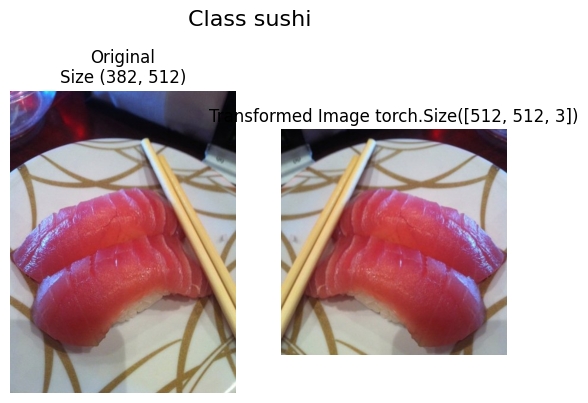

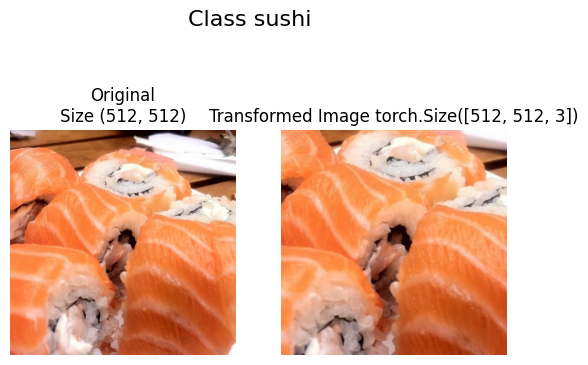

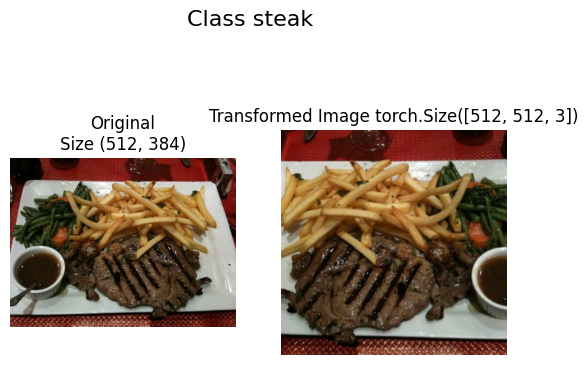

In [14]:
# plt.imshow(data_transformed.squeeze(dim=0))
# Plotting the transformed images
def plot_transformed_image(images_path, image_transformer, n=3, seed= 42):
  '''Selects random image from the path of the image and load/transform.
  then plots the original vs transforms vsersion'''
  if seed:
    random.seed(seed)

  # get the random image path
  random_image_path = random.sample(images_path, k=n)

  for image_path in random_image_path:
    with Image.open(image_path) as random_image:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(random_image)
      ax[0].set_title(f"Original\nSize {random_image.size}")
      ax[0].axis(False)

      ### Transform and plot the target image
      transformed_image = image_transformer(random_image).permute(1,2,0) # we will need to change the shape of
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed Image {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class {image_path.parent.stem}", fontsize= 16)

# Calling the function
plot_transformed_image(images_path= image_list_path,
                       image_transformer= data_transform,
                       n=3,
                       seed= 42)

# Option 1: Loading Image data using `ImageFolder`

> We can load image classification data using `torchvision.datasets.ImageFolder`

In [15]:
data_transform = transforms.Compose([
    # Resize our image into 64x64
    transforms.Resize(size= (64,64)),
    # Flip the images randomly on the horizontly
    transforms.RandomHorizontalFlip(p= 0.5),
    # Turn the image into torch.Tensor
    transforms.ToTensor()
])

In [16]:
from torchvision import datasets

### For transforming train data
train_data = datasets.ImageFolder(root= train_dir,
                                  transform= data_transform, # a transform for the data
                                  target_transform= None)    # a transform for the label/target

### For transforming test data
test_data = datasets.ImageFolder(root= train_dir,
                                 transform= data_transform,
                                 target_transform= None)

# now check
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
# get the class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image data type: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

Text(0.5, 1.0, 'pizza')

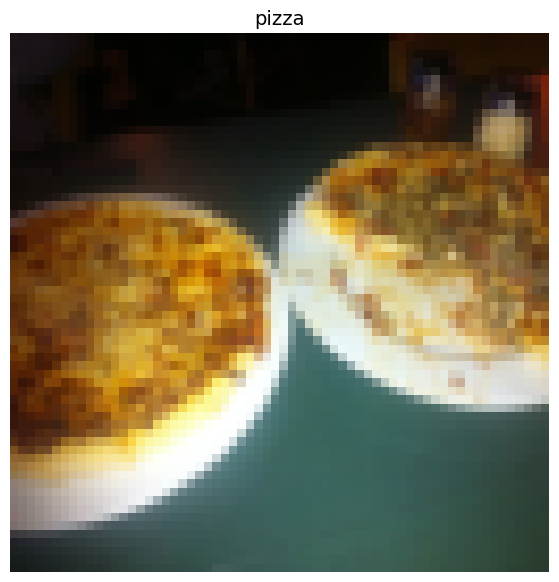

In [20]:
# rearrange the order dimensions
img_permute = img.permute(1,2,0)
# img_permute.shape

# plot the image
plt.figure(figsize= (10, 7))
plt.imshow(img_permute)
plt.axis(False) # "off" also works
plt.title(class_names[label], fontsize=14)

### Turn Loaded Images into DataLoader

In [21]:
import os
os.cpu_count()

2

In [22]:
# turn train and test into DataLoader's
from torch.utils.data import DataLoader

BATCH_SIZE= 1
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              num_workers= 1,
                              shuffle= True) # os.cpu_count() we can make full as well\

test_dataloader = DataLoader(dataset= test_data,
                             batch_size=1,
                             num_workers= 1,
                             shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df120a3d900>,
 <torch.utils.data.dataloader.DataLoader at 0x7df120a3dd20>)

In [23]:
len(train_data), len(train_dataloader)

(225, 225)

In [24]:
len(train_data), len(train_dataloader)

(225, 225)

In [25]:
img, label = next(iter(train_dataloader))

# Batch size will be one you can change if you want
print(f"Image shape : {img.shape} ----> [batch_size, color_channel, height, width]")
print(f"Label shape : {label.shape}")

Image shape : torch.Size([1, 3, 64, 64]) ----> [batch_size, color_channel, height, width]
Label shape : torch.Size([1])


# Option2: Loading Image data with custom `DataLoader`

Want to be able to:
- Load images from files
- Get the class names from dataset
- Get the class as dictonary from dataset

In [26]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

from typing import Tuple, Dict, List

#### 1- Creating a helper function to get the class names

In [27]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [28]:
# setup a path for target directory
target_directory = train_dir
print(f"Target dir {target_directory}")

# get the class names from the target directory
class_names_found = [directory.name for directory in list(os.scandir(target_directory))]
class_names_found

Target dir data/pizza_steak_sushi/train


['sushi', 'steak', 'pizza']

In [29]:
def find_classes(dir_path: str) -> Tuple[List[str], Dict[str, int]]:
  '''Find the class folder names in the target directory'''
  # 1. Get the class names by scanning the target directory
  classes = sorted([directory.name for directory in list(os.scandir(dir_path)) if directory.is_dir()])

  # 2. Raise an error

  # 3. Get the class dictonary contains class_names: label
  classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, classes_to_idx

In [30]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

#### 2- Create a custom `Dataset` to replicate `ImageFolder`

> Note: Ideally this should not require but just to practice.

In [31]:
from torch.utils.data import Dataset

# 1. subclass the torch.utils.data.Dataset
class ImageFolderCustom(torch.utils.data.Dataset):
  # 2. initialize custom dataset
  def __init__(self, targ_dir: str, transform= None):
    # 3. create class attributes
    ## get all the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    ## setup transforms
    self.transform = transform
    ## using the custom function for classes and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # 4. create a function to load image
  def load_image(self, index: int) -> Image.Image:
    '''open an image via path and returns it'''
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. overwrite the __len__() [which is optional]
  def __len__(self):
    'returns the length of the sample'
    return len(self.paths)

  # 6. overwrite the __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    '''It basically replica of a below function
    img, label = train_data[0]'''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_names/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [32]:
# create a transform
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size= (64,64)),
                                       transforms.RandomHorizontalFlip(p= 0.5),
                                       transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()])


In [33]:
# Testing out ImageFolder custom class
train_data_custom = ImageFolderCustom(targ_dir= train_dir,
                                      transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir= test_dir,
                                     transform= test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7df120a3fa90>,
 <__main__.ImageFolderCustom at 0x7df120a3c040>)

In [34]:
len(train_data), len(train_data_custom)

(225, 225)

In [35]:
train_data.classes, train_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [36]:
train_data.class_to_idx, train_data_custom.class_to_idx

({'pizza': 0, 'steak': 1, 'sushi': 2}, {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a function to display random Images

In [37]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

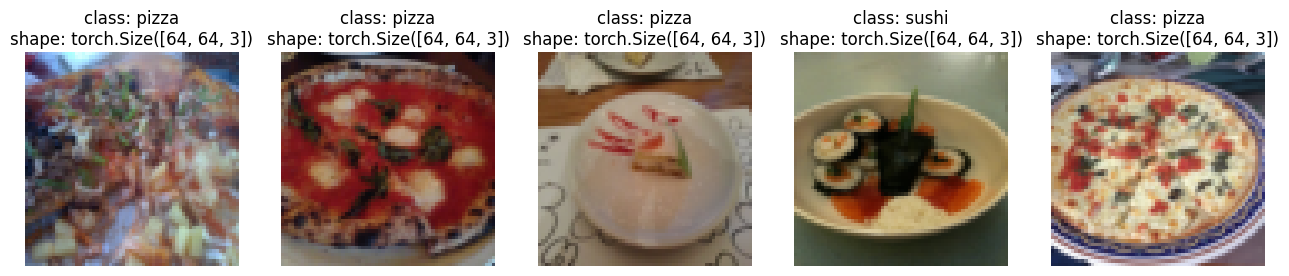

In [38]:
display_random_images(train_data,
                      n=5,
                      classes= class_names,
                      seed= None)

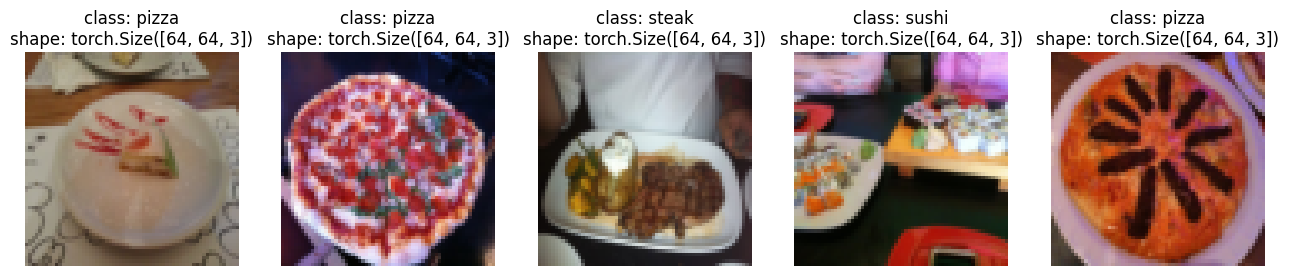

In [39]:
# Display random images from the ImageFolder custom
display_random_images(train_data_custom,
                     n=5,
                     classes= train_data_custom.classes,
                      seed= None)

### Turn custom loaded images into `DataLoader` class

In [40]:
from torch.utils.data import DataLoader

BATCH_SIZE= 32
NUM_WORKERS= os.cpu_count()

train_dataloader_custom = DataLoader(dataset= train_data_custom,
                                     batch_size= BATCH_SIZE,
                                     num_workers= NUM_WORKERS,
                                     shuffle= True)

test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                    batch_size= BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle= False)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7df120a8e2f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7df120a8ef50>)

In [41]:
# Get the image and label from train_dataloader_custom
image_custom, label_custom = next(iter(train_dataloader_custom))

# printing the shape
image_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

# Other forms of trannformation (Data Augmentation)

### Trivial Augment (trivialaugment)

In [42]:
from torchvision import transforms

train_transform = transforms.Compose([transforms.Resize(size= (224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins= 15),
                                      transforms.ToTensor()
                                      ])
test_transform = transforms.Compose([transforms.Resize(size= (224,224)),
                                     transforms.ToTensor()
                                     ])



In [43]:
# Get all the image path
image_list_path = list(image_path.glob("*/*/*.jpg"))
image_list_path[:4]

[PosixPath('data/pizza_steak_sushi/train/sushi/3579071.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2021685.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/2590819.jpg'),
 PosixPath('data/pizza_steak_sushi/train/sushi/700405.jpg')]

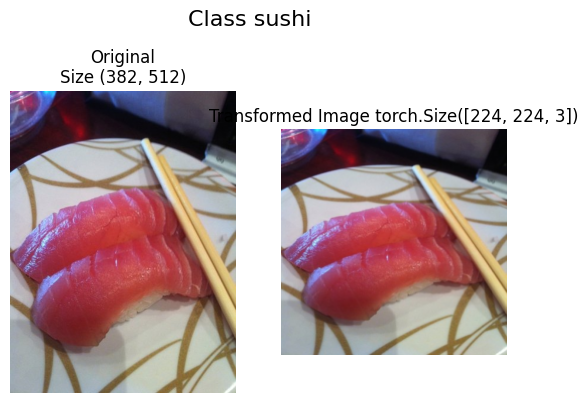

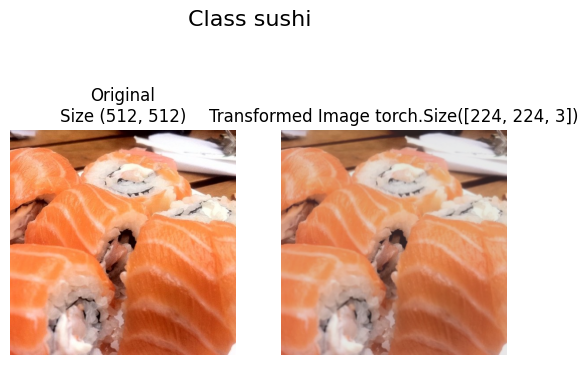

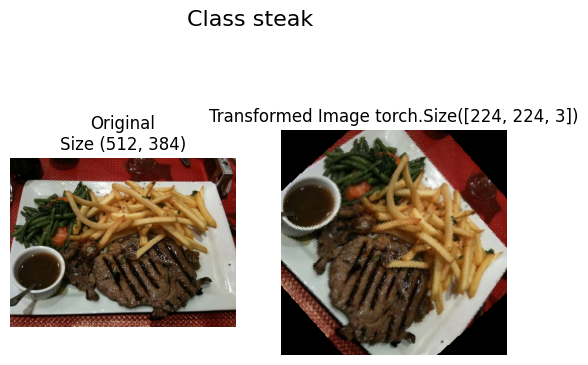

In [44]:
# def plot_transformed_image(images_path, image_transformer, n=3, seed= 42):
plot_transformed_image(images_path= image_list_path,
                       image_transformer= train_transform,
                       n=3,
                       seed=42)

# Model 0: TinyVGG Without data augmentation
> It's time to create first model for image

## Creating transforms and load data for for model 0

In [45]:
# create a simple transforms
simple_transform = transforms.Compose([transforms.Resize(size= (64,64)),
                                      transforms.ToTensor()])

In [46]:
# 1. Load and Transform the data
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root= train_dir,
                                         transform= simple_transform)
test_data_simple = datasets.ImageFolder(root= test_dir,
                                        transform= simple_transform)
train_data_simple, test_data_simple

# 2. Turn datasets into DataLoader
import os
from torch.utils.data import DataLoader

BATCH_SIZE= 32
NUM_WORKERS= os.cpu_count()

# create dataloader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size= BATCH_SIZE,
                                     num_workers= NUM_WORKERS,
                                     shuffle= True)
test_dataloader_simple = DataLoader(dataset= test_data_simple,
                                    batch_size= BATCH_SIZE,
                                    num_workers= NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7df1222c39d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7df1bc009d20>)

## Create TinyVGG model class

In [47]:
class TinyVGG(nn.Module):
  '''This model's architecture is very similar to TinyVGG'''
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    # create 1st block of convolution layer
    self.convBlock_1 = nn.Sequential(
      nn.Conv2d(in_channels= input_shape, out_channels= hidden_units, kernel_size= 3, stride= 1, padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size= 3,stride= 1, padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2) # default stride value same as kernel size
    )
    # create 2nd block of convolution layer
    self.convBlock_2 = nn.Sequential(
      nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size= 3, stride= 1, padding=0),
      nn.ReLU(),
      nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units, kernel_size= 3,stride= 1, padding=0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride=2) # default stride value same as kernel size
    )
    # create a classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*13*13, out_features = output_shape) # we can get in_features shape by passing dummy data in the model
    )

  # create a forward pass
  def forward(self, x):
    # x = self.convBlock_1(x)
    # print(x.shape)
    # x = self.convBlock_2(x)
    # print(x.shape)
    # x = self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.convBlock_2(self.convBlock_1(x))) # this will work as well

In [48]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape= 3, # number of color channels
                  hidden_units= 10,
                  output_shape= len(class_names)).to(device)

model_0

TinyVGG(
  (convBlock_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## passing sample data just to get the in_features shape inside nn.Linear layer


In [49]:
# get a sample image
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

### Use `torchinfo`
> To check the shape inside the layers

In [51]:
try:
  import torchinfo
except:
  ! pip install torchinfo
  import torchinfo

from torchinfo import summary

In [52]:
summary(model_0, input_shape= [1,3,64,64])

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      5,073
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0

In [53]:
torchinfo.summary(model_0, input_shape= image_batch.shape)

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      5,073
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0

In [54]:
# 23:17:17

## Creating a Training and Test Loop

In [65]:
# @title create a train loop
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fnct: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  # put the model in train mode
  model.train()

  # setup train loss and train accuracy
  train_loss, train_acc = 0,0

  # loop through dataloader
  for batch, (image, label) in enumerate(dataloader):
    # send data to the device
    image, label = image.to(device), label.to(device)

    # 1. forward pass
    train_pred_logits = model(image) # remember this is logits

    # 2. calculate the loss
    loss = loss_fnct(train_pred_logits, label)
    train_loss += loss.item() # to get the singular value

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. back propagration
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # calculate the accuracy
    train_pred_labels = torch.argmax(torch.softmax(train_pred_logits, dim=1), dim=1)
    # y_pred_class = torch.argmax(train_pred, dim=1) # this will also be same
    train_acc += (train_pred_labels == label).sum().item() / len(train_pred_labels) # calculating per batch

  # adjust metrics to get the average loss and accuracy per batch
  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc/ len(dataloader)

  return train_loss, train_acc

In [66]:
# @title create a test loop
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fnct: torch.nn.Module):
  # Putting model into eval model
  model.eval()

  # setup test loss and test accuracy value
  test_loss, test_acc = 0,0

  # Turn on inference mode
  with torch.inference_mode():
    # loop through Dataloader
    for batch, (image, label) in enumerate(dataloader):
      # put data into target device
      image, label = image.to(device), label.to(device)

      # 1. forward pass
      test_pred_logits = model(image)

      # 2. calculate the loss
      loss = loss_fnct(test_pred_logits, label)
      test_loss += loss.item() # to get the singular value

      # 3. calculate the accuracy
      test_pred_labels = torch.argmax(test_pred_logits, dim=1)
      test_acc += (test_pred_labels == label).sum().item() / len(test_pred_labels)

    # adjust the metrics to get accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc

In [70]:
# @title create a `train()` function which will combine `train_step()` and `train_step()`

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fnct: torch.nn.Module,
          epochs: int = 5,
          device= device):
  # 1. create empty results dictonary
  result_dict = {"Train_loss": [], "Train_acc" : [], "Test_loss" : [], "Test_acc"  : []}

  # 2. Loop through train & test in loop
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model, train_dataloader, loss_fnct, optimizer)

    test_loss, test_acc = test_step(model, test_dataloader, loss_fnct )

    # 3. printout
    print(f"Epoch: {epoch} | Train_loss: {train_loss:.4f} | Train_acc: {train_acc:.4f} | Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}")

    # 4. updating the result dictonary
    result_dict["Train_loss"].append(train_loss)
    result_dict["Train_acc"].append(train_acc)
    result_dict["Test_loss"].append(test_loss)
    result_dict["Test_acc"].append(test_acc)

  # 5. Returning the results
  return result_dict

## Train and Evaluate the model

In [71]:
# set the seed
torch.manual_seed(42)

# set the number of epochs
NUM_EPOCHS= 5

# Recreate the model
model_0 = TinyVGG(input_shape= 3, # This is number of color channel
                  hidden_units= 10,
                  output_shape= len(train_data.classes)).to(device)

# setup loss function and accuracy
loss_fnct = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_0.parameters(),
                                  lr= 0.001) # default one

# start the timer
from timeit import default_timer
start_time = default_timer()

model_0_results = train(model= model_0,
                        train_dataloader= train_dataloader_simple,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fnct= loss_fnct,
                        epochs= NUM_EPOCHS)
# end the timer
end_time= default_timer()

print(f"The total time model took to train {end_time-start_time : .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 1.1063 | Train_acc: 0.3047 | Test_loss: 1.0983 | Test_acc: 0.3011
Epoch: 1 | Train_loss: 1.0998 | Train_acc: 0.3281 | Test_loss: 1.0697 | Test_acc: 0.5417
Epoch: 2 | Train_loss: 1.0869 | Train_acc: 0.4883 | Test_loss: 1.0808 | Test_acc: 0.4924
Epoch: 3 | Train_loss: 1.0842 | Train_acc: 0.3984 | Test_loss: 1.0608 | Test_acc: 0.5833
Epoch: 4 | Train_loss: 1.0662 | Train_acc: 0.4141 | Test_loss: 1.0654 | Test_acc: 0.5644
The total time model took to train  11.136 seconds


<Axes: >

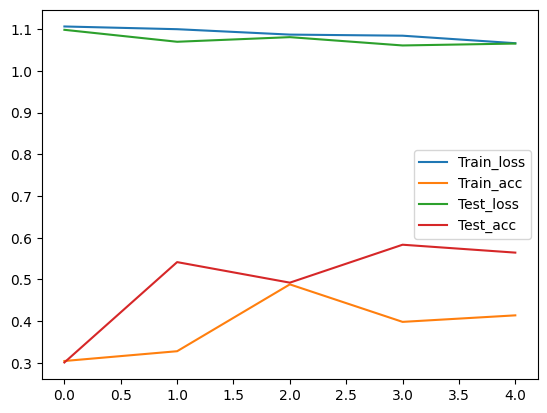

In [75]:
import pandas as pd
pd.DataFrame(model_0_results).plot()

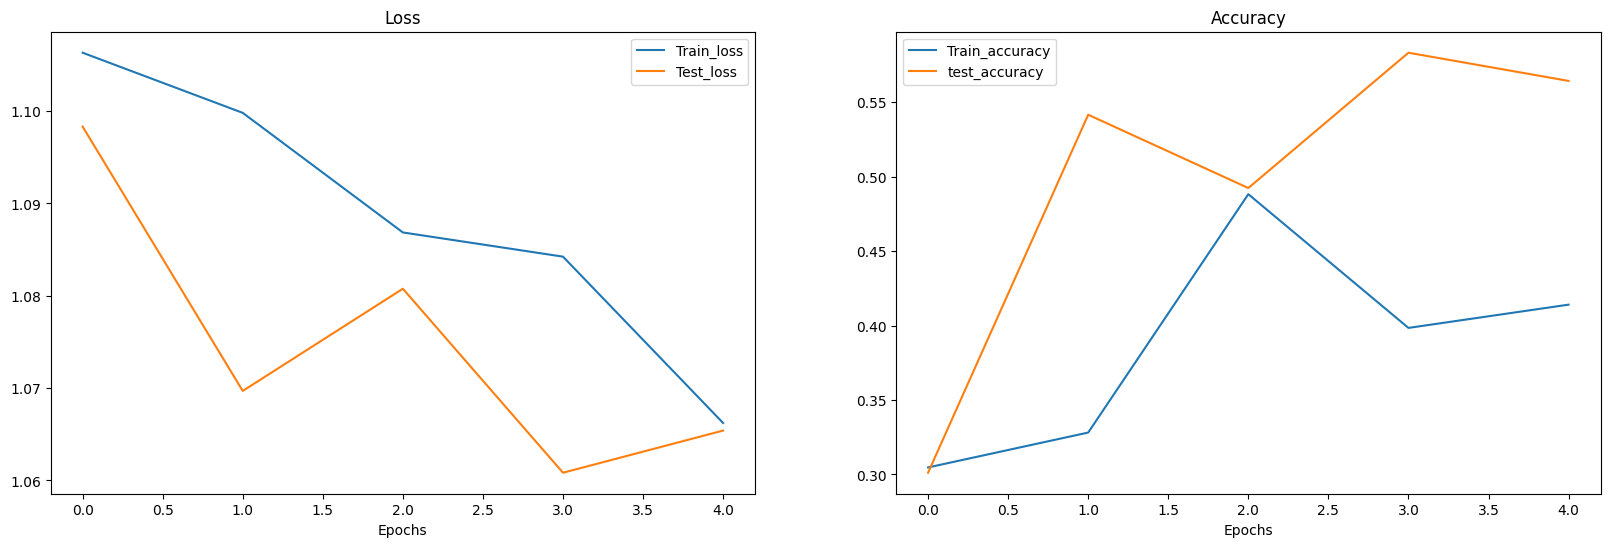

In [96]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"Train_loss": [...],
             "Train_acc": [...],
             'Test_loss': [...],
             'Test_acc': [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['Train_loss']
    test_loss = results['Test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['Train_acc']
    test_accuracy = results['Test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['Train_loss']))

    # Setup a plot
    plt.figure(figsize=(20, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Train_loss')
    plt.plot(epochs, test_loss, label='Test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(model_0_results)

# Model 1: TinyVGG with Data Augmentation

## Create Transforms with data augmentation

In [110]:
# Create training transforms with Trivial Augmentation
from torchvision import transforms

train_transform_trivial = transforms.Compose([transforms.Resize(size= (64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins= 31),
                                               transforms.ToTensor()
])

test_transform_trivial = transforms.Compose([transforms.Resize(size=(64,64)),
                                              transforms.ToTensor()
])

## Create train and test `dataset's` and `dataloader` with data augmentation

In [111]:
# @title Turn image folder into datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root= train_dir,
                                            transform= train_transform_trivial)
test_data_simple     = datasets.ImageFolder(root= test_dir,
                                            transform= test_transform_trivial)

In [112]:
# @title Turn datasets into dataloader
import os
from torch.utils.data import DataLoader

torch.manual_seed(42)
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset= train_data_augmented,
                                      batch_size= BATCH_SIZE,
                                      shuffle= True,
                                      num_workers= NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset= train_data_simple,
                                    batch_size= BATCH_SIZE,
                                    shuffle= False,
                                    num_workers= NUM_WORKERS)

In [113]:
# @title Construct and train Model-1

model_1 = TinyVGG(input_shape= 3,
                  hidden_units= 10,
                  output_shape= len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (convBlock_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convBlock_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [118]:
# @title start training

# set random seed
torch.manual_seed(42)

# setnumber of epochs
NUM_EPOCHS = 5

# setup loss function and accuracy
loss_fnct = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_1.parameters(),
                                  lr= 0.001) # default one

# start the timer
from timeit import default_timer
start_time = default_timer()

model_1_results = train(model= model_1,
                        train_dataloader= train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer= optimizer,
                        loss_fnct= loss_fnct,
                        epochs= NUM_EPOCHS)
# end the timer
end_time= default_timer()

print(f"The total time model took to train {end_time-start_time : .3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train_loss: 0.9894 | Train_acc: 0.4336 | Test_loss: 0.8166 | Test_acc: 0.7070
Epoch: 1 | Train_loss: 1.0235 | Train_acc: 0.4531 | Test_loss: 0.8685 | Test_acc: 0.6016
Epoch: 2 | Train_loss: 0.8728 | Train_acc: 0.5742 | Test_loss: 0.8814 | Test_acc: 0.6094
Epoch: 3 | Train_loss: 0.9578 | Train_acc: 0.6172 | Test_loss: 0.8606 | Test_acc: 0.6797
Epoch: 4 | Train_loss: 0.8964 | Train_acc: 0.5938 | Test_loss: 0.8577 | Test_acc: 0.6641
The total time model took to train  16.367 seconds


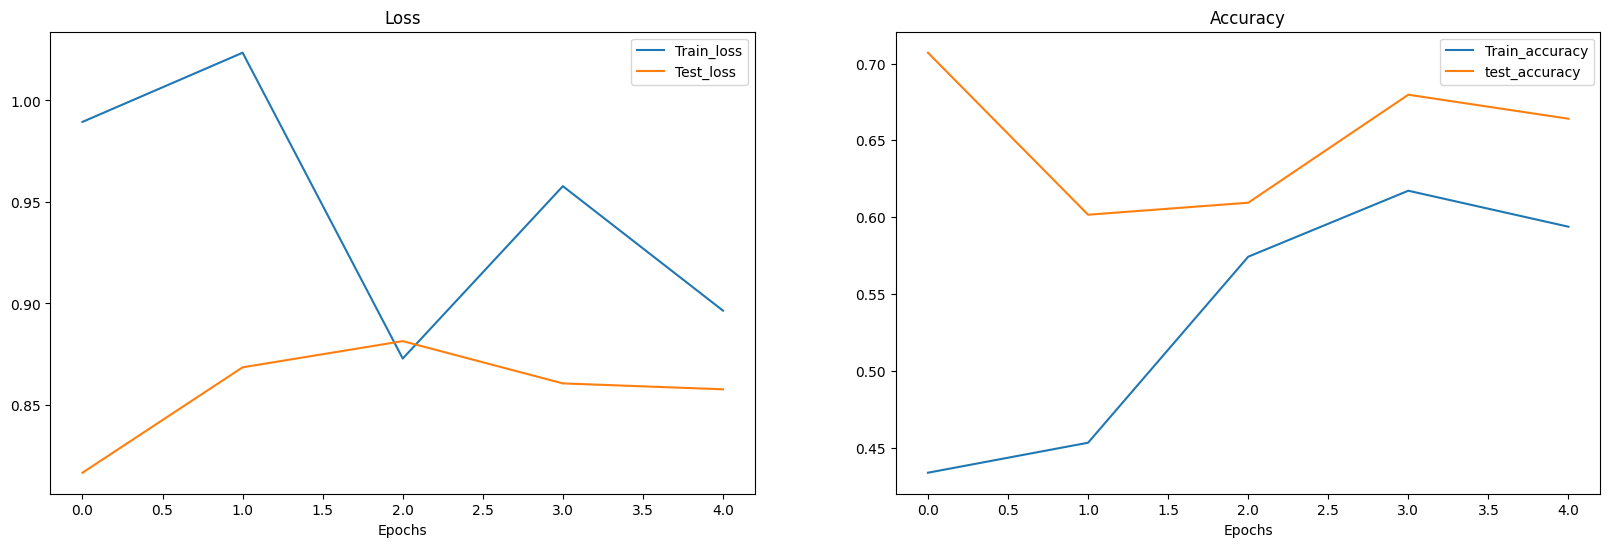

In [119]:
plot_loss_curves(model_1_results)

## Compare Model results

There are many ways
---------
- Hard Coding
- PyTorch + Tensorboard (torch.utils.tensorboard)[https://pytorch.org/docs/stable/tensorboard.html]
- Weights and Biases (https://wandb.ai/site/experiment-tracking/)
- MLFlow - https://mlflow.org/docs/latest/index.html


In [120]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,Train_loss,Train_acc,Test_loss,Test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099806,0.328125,1.069690,0.541667
2,1.086854,0.488281,1.080757,0.492424
3,1.084233,0.398438,1.060832,0.583333
4,1.066216,0.414062,1.065396,0.564394


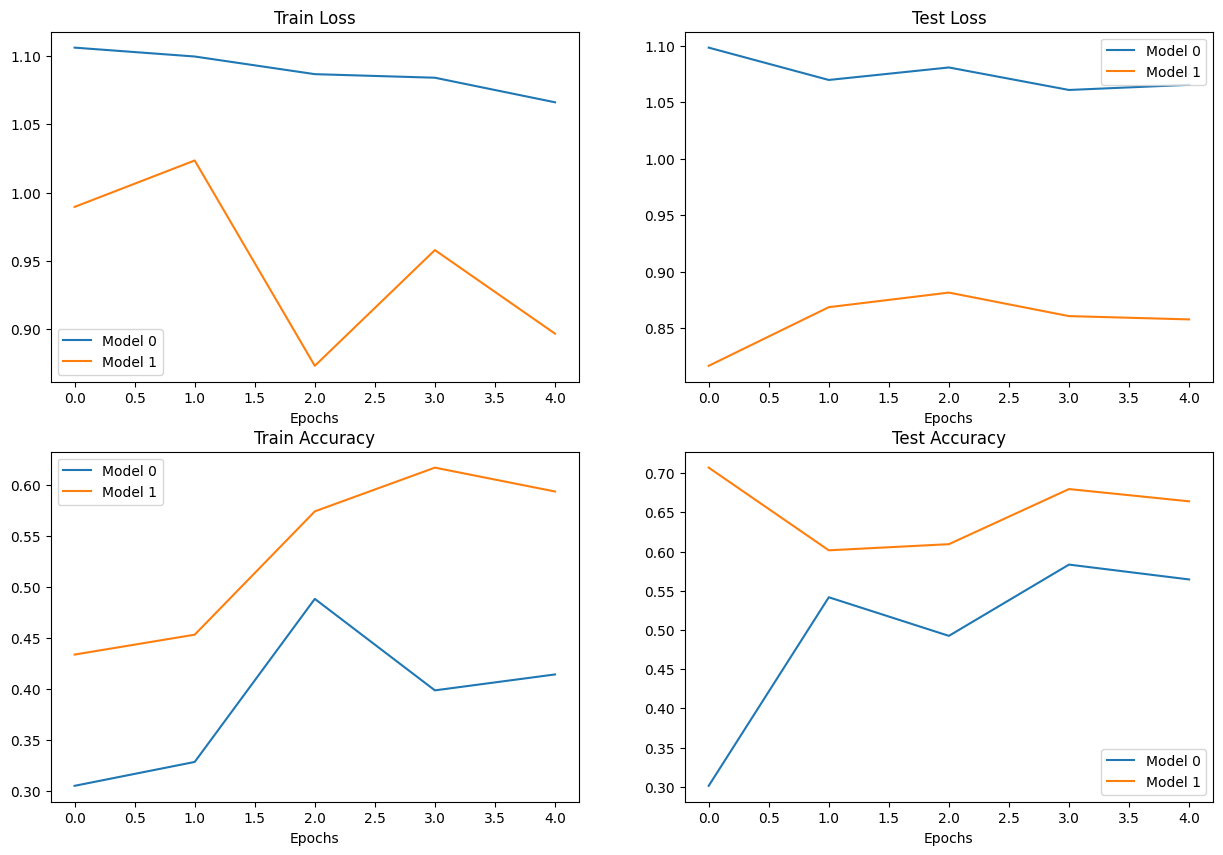

In [121]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["Train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["Train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["Test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["Test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["Train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["Train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["Test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["Test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();